In [ ]:
# BY using ETL Process we apply the Machine Learning Algorithm on our dataset.Now first Understand What is ETL Process?
# ETL is a process that allows you to extract data from various sources,
# transform it according to your requirements and finally load it into a database or data format of your choice.
# Now in this project I will show you an example of ETL process. Project is Completely based on Happiness Score of Different Countries. 
# As programming language I use Python. I scrape the happiness values from Wikipedia, 
# the population data for each country from Rapid API. 

# Importing the modules

In [262]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [263]:
data = requests.get("https://en.wikipedia.org/wiki/World_Happiness_Report")
#print(data.status_code)

In [264]:
soup = BeautifulSoup(data.content,'html.parser')

In [265]:
tables = soup.find_all('table',{'class':"wikitable"})
table = tables[0]


In [266]:
data = pd.read_html(str(table))
df_happiness = pd.DataFrame(data[0]) 

In [267]:
df_happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434


In [268]:
df_happiness.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [269]:
df_happiness.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [270]:
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  153 non-null    int64  
 1   Country or region             153 non-null    object 
 2   Score                         153 non-null    float64
 3   GDP per capita                153 non-null    float64
 4   Social support                153 non-null    float64
 5   Healthy life expectancy       153 non-null    float64
 6   Freedom to make life choices  153 non-null    float64
 7   Generosity                    153 non-null    float64
 8   Perceptions of corruption     153 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 10.9+ KB


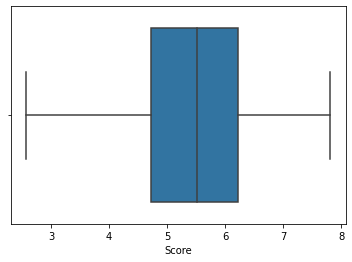

In [271]:
#Checking Outliers if exist
#checking Outliers on Target variable
sns.boxplot(data = df_happiness, x = 'Score')
plt.show()

# Label Encoding

In [272]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_happiness['Country or region'] = lb.fit_transform(df_happiness['Country or region'])
df_happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,42,7.809,1.285,1.500,0.961,0.662,0.160,0.478
1,2,35,7.646,1.327,1.503,0.979,0.665,0.243,0.495
2,3,131,7.560,1.391,1.472,1.041,0.629,0.269,0.408
3,4,56,7.504,1.327,1.548,1.001,0.662,0.362,0.145
4,5,105,7.488,1.424,1.495,1.008,0.670,0.288,0.434


In [273]:
#Split the dataset into Dependent & Independent Variables
X = df_happiness.drop('Score',axis=1)
X

,Overall rank,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,42,1.285,1.500,0.961,0.662,0.160,0.478
1,2,35,1.327,1.503,0.979,0.665,0.243,0.495
2,3,131,1.391,1.472,1.041,0.629,0.269,0.408
3,4,56,1.327,1.548,1.001,0.662,0.362,0.145
4,5,105,1.424,1.495,1.008,0.670,0.288,0.434
...,...,...,...,...,...,...,...,...
148,149,23,0.041,0.000,0.000,0.293,0.254,0.028
149,150,116,0.343,0.523,0.572,0.604,0.236,0.486
150,151,152,0.426,1.048,0.375,0.377,0.151,0.081
151,152,126,0.289,0.553,0.209,0.066,0.210,0.111


In [274]:
y = df_happiness['Score']
y

0      7.809
1      7.646
2      7.560
3      7.504
4      7.488
       ...  
148    3.476
149    3.312
150    3.299
151    2.817
152    2.567
Name: Score, Length: 153, dtype: float64

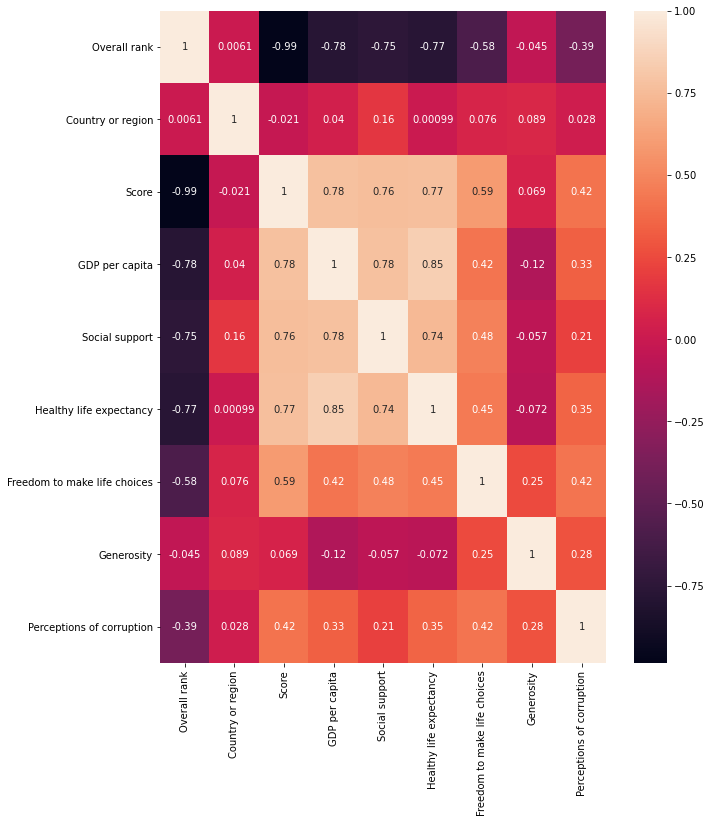

In [275]:
plt.figure(figsize=(10,12))
sns.heatmap(df_happiness.corr(), annot=True)
plt.show()

Text(0.5, 1.0, 'Score  - Healthy life expectancy')

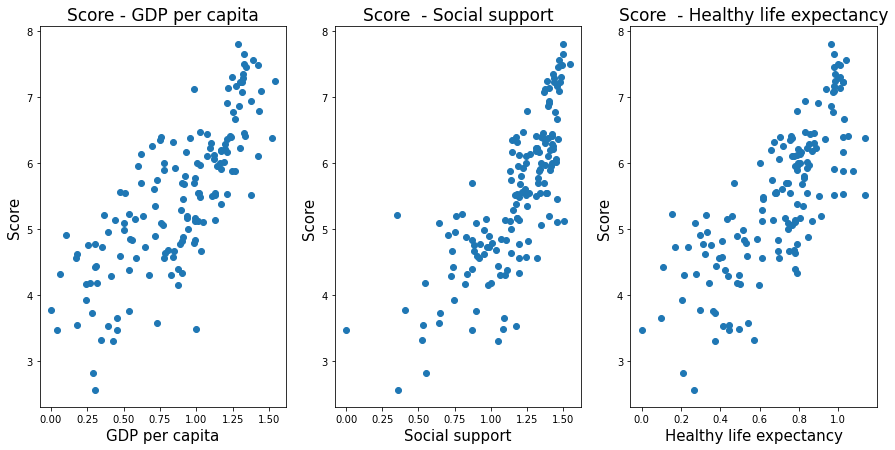

In [276]:
#Effect of GDP per capita,Socialsupport,Healthy life expectancy,freedom to make life choices
#and Generosity  on Happiness Score
plt.figure(figsize=(15,7))
plt.subplot(1, 3, 1)
plt.scatter(df_happiness["GDP per capita"],df_happiness["Score"])
plt.xlabel("GDP per capita",fontsize=15)
plt.ylabel("Score",fontsize=15)
plt.title("Score - GDP per capita",fontsize=17)

plt.subplot(1, 3, 2)
plt.scatter(df_happiness["Social support"], df_happiness["Score"])
plt.xlabel("Social support",fontsize=15)
plt.ylabel("Score ",fontsize=15)
plt.title("Score  - Social support",fontsize=17)

plt.subplot(1, 3, 3)
plt.scatter(df_happiness["Healthy life expectancy"], df_happiness["Score"])
plt.xlabel("Healthy life expectancy",fontsize=15)
plt.ylabel("Score ",fontsize=15)
plt.title("Score  - Healthy life expectancy",fontsize=17)



Text(0.5, 1.0, 'Score - Generosity')

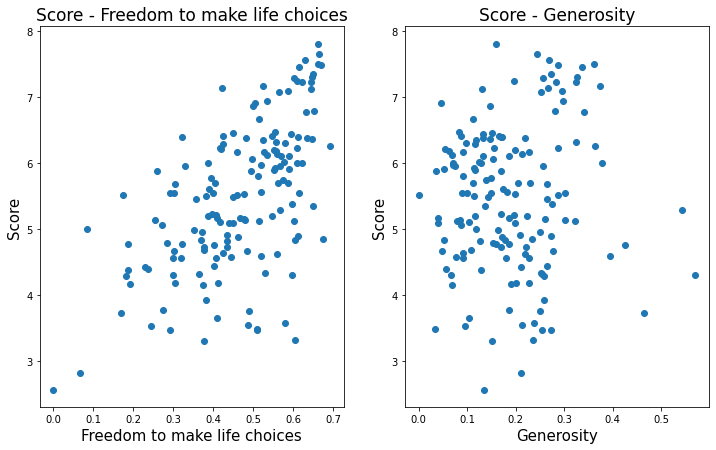

In [277]:
plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.scatter(df_happiness["Freedom to make life choices"],df_happiness["Score"])
plt.xlabel("Freedom to make life choices",fontsize=15)
plt.ylabel("Score",fontsize=15)
plt.title("Score - Freedom to make life choices",fontsize=17)


plt.subplot(1, 2, 2)
plt.scatter(df_happiness["Generosity"],df_happiness["Score"])
plt.xlabel("Generosity",fontsize=15)
plt.ylabel("Score",fontsize=15)
plt.title("Score - Generosity",fontsize=17)

# Standard Scaler

In [278]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X)
data_feat = pd.DataFrame(sc.fit_transform(X))
data_feat.head()

,0,1,2,3,4,5,6,7
0,-1.720767,-0.769817,1.121293,1.204652,1.058584,1.410735,-0.293355,3.081010
1,-1.698125,-0.928308,1.234440,1.215144,1.129652,1.432061,0.535783,3.231831
2,-1.675484,1.245292,1.406854,1.106723,1.374440,1.176155,0.795513,2.459983
3,-1.652842,-0.452833,1.234440,1.372529,1.216512,1.410735,1.724548,0.126699
4,-1.630200,0.656608,1.495756,1.187165,1.244150,1.467603,0.985316,2.690650


# Splitting train & test Dataset

In [279]:
#Split data into train & test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(sc.fit_transform(X),y,test_size=0.2,random_state=1)

In [280]:
len(X_train)

122

In [281]:
len(X_test)

31

In [282]:
len(y_train)

122

In [283]:
len(y_test)

31

In [285]:
#training  and fitting the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [286]:
y_pred = lr.predict(X_train)
print("Bias = ", r2_score(y_train, y_pred))

Bias =  0.9751499110627272


In [287]:
y_pred = lr.predict(X_test)
print("Variance = ", r2_score(y_test, y_pred))

Variance =  0.9742911166071215


In [291]:
from sklearn.preprocessing import PolynomialFeatures
X = df_happiness.drop(['Score'],axis=1)
y = df_happiness['Score']
pf = PolynomialFeatures()
X_degree_2 = pf.fit_transform(X)

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X_degree_2, y, 
                                                    test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(lr.score(X_test, y_test))

0.9468584792865722


In [294]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("R2 = ", r2_score(y_test, y_pred))

R2 =  0.9889607076799004
